<a href="https://colab.research.google.com/github/romanvaibhav/CollegeRanker/blob/main/Project_4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Gold Price Prediction

## Import Libraries

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

## Task 1: Initial Data Exploration

In [25]:
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')


In [26]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [27]:
df.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88
2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43
2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03
2019-08-30,1526.55,1528.40,1253.14,1251.15,1382.75,1383.51
2019-09-02,1523.35,1525.95,1260.42,1265.01,1388.69,1391.51


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [29]:
df.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


## Task 2: Create Train & Test Sets

In [35]:
df['Return'] = df['USD (PM)'].pct_change() * 100



In [36]:
df['Lagged_Return'] = df.Return.shift()


In [37]:
df = df.dropna()

In [38]:
train = df['2001':'2018']


In [39]:
test = df['2019']

In [40]:
X_train = train["Lagged_Return"].to_frame()


In [41]:
y_train = train["Return"]


In [42]:
X_test = test["Lagged_Return"].to_frame()


In [43]:
y_test = test["Return"]

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
predictions = model.predict(X_test)

## Task 3: Develop Models & Predictions

In [49]:
out_of_sample_results = y_test.to_frame()

In [50]:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

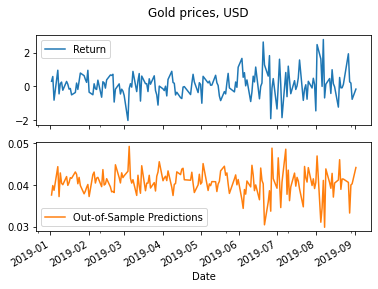

In [53]:
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()
